---

# <center> ★ AI / ML Project - Breast Cancer Diagnosis ★
#### <center> ***Domain: Healthcare***

---

<img src="breast cancer.jpg" style="width: 500px;"/>

---

### Description:

Breast cancer is the most common cancer amongst women in the world. It accounts for 25% of all cancer cases, and affected over 2.1 Million people in 2015 alone. It starts when cells in the breast begin to grow out of control. These cells usually form tumors that can be seen via X-ray or felt as lumps in the breast area.

The key challenges against it’s detection is how to classify tumors into malignant (cancerous) or benign(non cancerous). We ask you to complete the analysis of classifying these tumors using machine learning (with SVMs) and the Breast Cancer Wisconsin (Diagnostic) Dataset.


### Acknowledgements:
This dataset is taken from Kaggle, \
https://www.kaggle.com/c/breast-cancer-classification/data

### Objective:
- Understand the Dataset & cleanup (if required).
- Build classification model to predict wheather the cancer type is Malignant or Benign.
- Also fine-tune the hyperparameters & compare the evaluation metrics of vaious classification algorithms.

---

## <center> Stractegic Plan of Action:

**We aim to solve the problem statement by creating a plan of action, Here are some of the necessary steps:**
1. Data Exploration
2. Exploratory Data Analysis (EDA)
3. Data Pre-processing
4. Data Manipulation
5. Feature Selection/Extraction
6. Predictive Modelling
7. Project Outcomes & Conclusion

---

## <center>1. Data Exploration

In [1]:
#Importing the basic librarires

import os
import math
import scipy
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import tree
from scipy.stats import randint
from scipy.stats import loguniform
from IPython.display import display

from imblearn.over_sampling import SMOTE
from sklearn.feature_selection import RFE
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold

from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, \
f1_score, roc_auc_score, roc_curve, precision_score, recall_score

import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [10,6]

import warnings 
warnings.filterwarnings('ignore')

In [66]:
#Importing the dataset

df = pd.read_csv('breast-cancer-data.csv').drop(['id'],axis=1)

target = 'diagnosis'
labels = ['Malignant','Benign']
features = [i for i in df.columns.values if i not in [target]]

original_df = df.copy(deep=True)
display(df.head())

print('\n\033[1mInference:\033[0m The Datset consists of {} features & {} samples.'.format(df.shape[1], df.shape[0]))

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678



Inference: The Datset consists of 31 features & 569 samples.


In [8]:
#Checking the dtypes of all the columns

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    object 
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

In [9]:
#Checking number of unique rows in each feature

df.nunique()

diagnosis                    2
radius_mean                456
texture_mean               479
perimeter_mean             522
area_mean                  539
smoothness_mean            474
compactness_mean           537
concavity_mean             537
concave points_mean        542
symmetry_mean              432
fractal_dimension_mean     499
radius_se                  540
texture_se                 519
perimeter_se               533
area_se                    528
smoothness_se              547
compactness_se             541
concavity_se               533
concave points_se          507
symmetry_se                498
fractal_dimension_se       545
radius_worst               457
texture_worst              511
perimeter_worst            514
area_worst                 544
smoothness_worst           411
compactness_worst          529
concavity_worst            539
concave points_worst       492
symmetry_worst             500
fractal_dimension_worst    535
dtype: int64

In [10]:
#Checking number of unique rows in each feature

nu = df[features].nunique().sort_values()
nf = []; cf = []; nnf = 0; ncf = 0; #numerical & categorical features

for i in range(df[features].shape[1]):
    if nu.values[i]<=15:cf.append(nu.index[i])
    else: nf.append(nu.index[i])

print('\n\033[1mInference:\033[0m The Datset has {} numerical & {} categorical features.'.format(len(nf),len(cf)))


Inference: The Datset has 30 numerical & 0 categorical features.


In [11]:
#Checking the stats of all the columns

display(df.describe())

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


**Inference:** The stats seem to be fine, let us gain more undestanding by visualising the dataset.

---

## <center> 2. Exploratory Data Analysis (EDA)

            Target Variable Distribution           


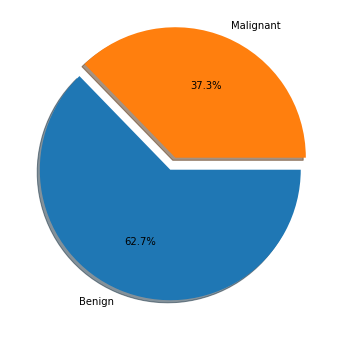

In [14]:
#Let us first analyze the distribution of the target variable

MAP={}
for e, i in enumerate(df[target].unique()):
    MAP[i]=labels[e]
df1 = df.copy()
df1[target]=df1[target].map(MAP)
explode=np.zeros(len(labels))
explode[-1]=0.1
print('\033[1mTarget Variable Distribution'.center(55))
plt.pie(df1[target].value_counts(), labels=df1[target].value_counts().index, counterclock=False, shadow=True, 
        explode=explode, autopct='%1.1f%%', radius=1)
plt.show()

**Inference:** The Target Variable seems to be slightly imbalanced! We shall try to fix this by augmenting data in the preprocessing step...

In [15]:
#Visualising the categorical features 

print('\033[1mVisualising Categorical Features:'.center(100))

n=3
plt.figure(figsize=[15,2.5*math.ceil(len(cf)/n)])

for i in range(len(cf)):
    if df[cf[i]].nunique()<=4:
        plt.subplot(math.ceil(len(cf)/n),n,i+1)
        sns.countplot(df[cf[i]])
    else:
        plt.subplot(math.ceil(len(cf)/2),2,i)
        sns.countplot(df[cf[i]])
plt.tight_layout()
plt.show()

                               Visualising Categorical Features:                                


<Figure size 1080x0 with 0 Axes>

**Inference:** There are no categorical features to visualize.

                                     Features Distribution                                      


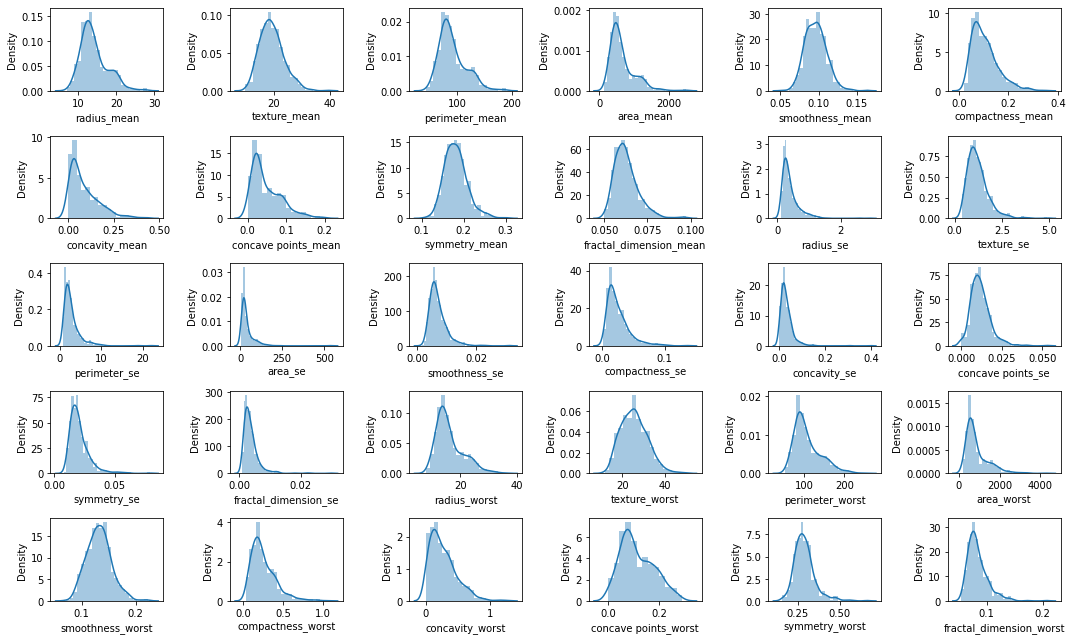

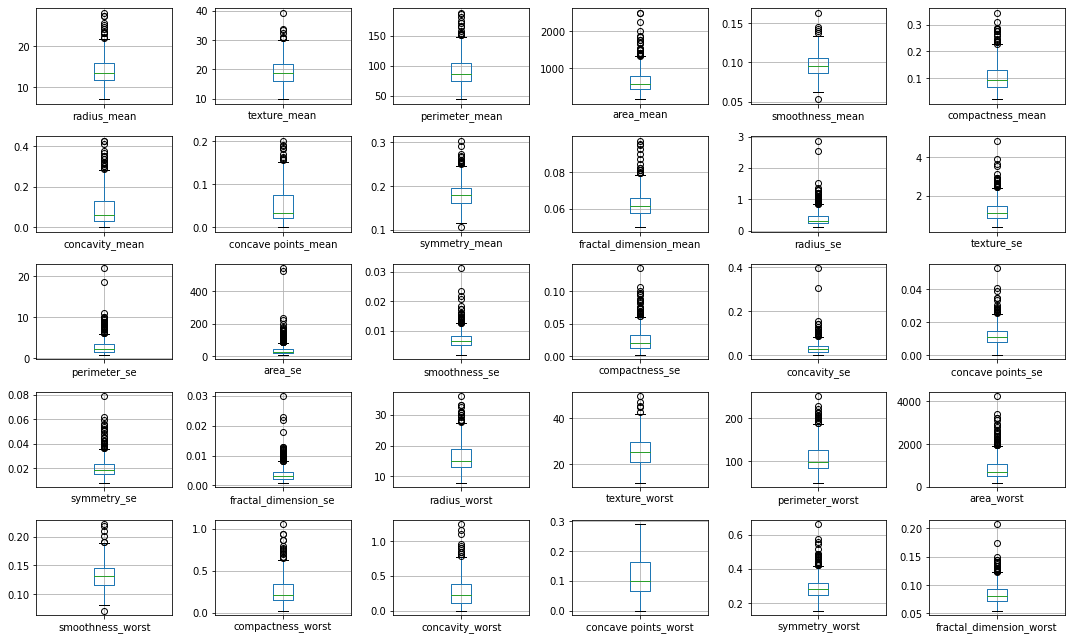

In [20]:
#Understanding the feature set

print('\033[1mFeatures Distribution'.center(100))

nf = [i for i in features if i not in cf]

plt.figure(figsize=[15,3*math.ceil(len(features)/10)])
for c in range(len(nf)):
    plt.subplot(math.ceil(len(features)/6),6,c+1)
    sns.distplot(df[nf[c]])
plt.tight_layout()
plt.show()

plt.figure(figsize=[15,3*math.ceil(len(features)/10)])
for c in range(len(nf)):
    plt.subplot(math.ceil(len(features)/6),6,c+1)
    df.boxplot(nf[c])
plt.tight_layout()
plt.show()

**Inference:** The data is somewhat normally distributed. And there are many outliers present in the dataset. We shall fix these outliers..

In [1]:
#Understanding the relationship between all the features

# g=sns.pairplot(df1, hue=target, size=4)
# #g.map_upper(sns.kdeplot, levels=1, color=".2")
# plt.show()

**Inference:** The data samples of most of the features do show some patterns. Also they seem
to have lot of overlap for the outcome classes, making it difficult to be distingusihable. 
Let is proceed to perform cleanup on the data to remove the irregularities...

---

## <center> 3. Data Preprocessing

In [67]:
#Check for empty elements

print(df.isnull().sum())
print('\n\033[1mInference:\033[0m The dataset doesn\'t have any null elements')

diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

Inference: The dataset doesn't have any null elements


In [68]:
#Removal of any Duplicate rows (if any)

counter = 0
r,c = original_df.shape

df1 = df.drop_duplicates()
df1.reset_index(drop=True,inplace=True)

if df1.shape==(r,c):
    print('\n\033[1mInference:\033[0m The dataset doesn\'t have any duplicates')
else:
    print(f'\n\033[1mInference:\033[0m Number of duplicates dropped ---> {r-df1.shape[0]}')


Inference: The dataset doesn't have any duplicates


In [69]:
#Removal of outlier:

df2 = df1.copy()

for i in features:
    if df2[i].nunique()>=12:
        Q1 = df2[i].quantile(0.15)
        Q3 = df2[i].quantile(0.85)
        IQR = Q3 - Q1
        df2 = df2[df2[i] <= (Q3+(1.5*IQR))]
        df2 = df2[df2[i] >= (Q1-(1.5*IQR))]
df2 = df2.reset_index(drop=True)
display(df2.head())
print('\n\033[1mInference:\033[0m After removal of outliers, The dataset now has {} features & {} samples.'.format(df2.shape[1], df2.shape[0]))

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
1,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
2,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.2,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678
3,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.1578,0.08089,0.2087,...,15.47,23.75,103.4,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440
4,M,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.1127,0.07400,0.1794,...,22.88,27.66,153.2,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368



Inference: After removal of outliers, The dataset now has 31 features & 502 samples.


In [85]:
#Converting categorical Columns to Numeric

df3 = df2.copy()

#Target Variable
MAP={}
for i,e in enumerate(df3[target].unique()):
    MAP[e]=i
df3[target]=df3[target].map(MAP)
print('Mapping Target variable --->',MAP)

#One-Hot Binay Encoding
oh=True
dm=True
for i in cf:
    #print(i)
    if df3[i].nunique()==2:
        if oh==True: print("One-Hot Encoding on features:")
        print(i);oh=False
        df3[i]=pd.get_dummies(df3[i], drop_first=True, prefix=str(i))
    if (df3[i].nunique()>2 and df2[i].nunique()<15):
        if dm==True: print("\nDummy Encoding on features:")
        print(i);dm=False
        df3 = pd.concat([df3.drop([i], axis=1), pd.DataFrame(pd.get_dummies(df3[i], drop_first=True, prefix=str(i)))],axis=1)
        

    

Mapping Target variable ---> {'M': 0, 'B': 1}


In [86]:
#Fixing the imbalance using SMOTE Technique

df4 = df3.copy()

print('Original class distribution:')
print(df4[target].value_counts())

xf = df4.columns
X = df4.drop([target],axis=1)
Y = df4[target]

smote = SMOTE()
X, Y = smote.fit_resample(X, Y)

df5 = pd.DataFrame(X, columns=xf)
df5[target] = Y

print('\nClass distribution after applying SMOTE Technique:',)
print(Y.value_counts())

Original class distribution:
1    337
0    165
Name: diagnosis, dtype: int64

Class distribution after applying SMOTE Technique:
0    337
1    337
Name: diagnosis, dtype: int64


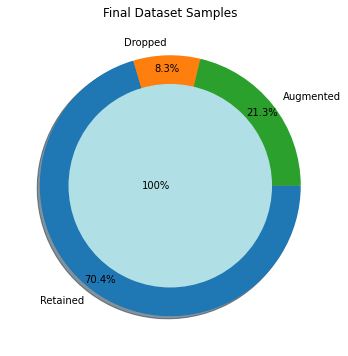


Inference:The final dataset after cleanup has 569 samples & 31 rows.


In [87]:
#Final Dataset size after performing Preprocessing

plt.title('Final Dataset Samples')
plt.pie([df.shape[0], original_df.shape[0]-df4.shape[0], df5.shape[0]-df4.shape[0]], radius = 1, shadow=True,
        labels=['Retained','Dropped','Augmented'], counterclock=False, autopct='%1.1f%%', pctdistance=0.9, explode=[0,0,0])
plt.pie([df.shape[0]], labels=['100%'], labeldistance=-0, radius=0.78, shadow=True, colors=['powderblue'])
plt.show()

print('\n\033[1mInference:\033[0mThe final dataset after cleanup has {} samples & {} rows.'.format(df.shape[0], df.shape[1]))

---

## <center> 4. Data Manipulation

In [91]:
#Splitting the data intro training & testing sets

df = df5.copy()

X = df.drop([target],axis=1)
Y = df[target]
Train_X, Test_X, Train_Y, Test_Y = train_test_split(X, Y, train_size=0.8, test_size=0.2, random_state=0)

print('Original set  ---> ',X.shape,Y.shape,'\nTraining set  ---> ',Train_X.shape,Train_Y.shape,'\nTesting set   ---> ', Test_X.shape,'', Test_Y.shape)

Original set  --->  (674, 30) (674,) 
Training set  --->  (539, 30) (539,) 
Testing set   --->  (135, 30)  (135,)


In [92]:
#Feature Scaling (Standardization)

std = StandardScaler()

print('\033[1mStandardardization on Training set'.center(100))
Train_X_std = std.fit_transform(Train_X)
Train_X_std = pd.DataFrame(Train_X_std, columns=X.columns)
display(Train_X_std.describe())

print('\n','\033[1mStandardardization on Testing set'.center(100))
Test_X_std = std.transform(Test_X)
Test_X_std = pd.DataFrame(Test_X_std, columns=X.columns)
display(Test_X_std.describe())

                               Standardardization on Training set                               


,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,5.390000e+02,5.390000e+02,5.390000e+02,5.390000e+02,5.390000e+02,5.390000e+02,5.390000e+02,5.390000e+02,5.390000e+02,5.390000e+02,...,5.390000e+02,5.390000e+02,5.390000e+02,5.390000e+02,5.390000e+02,5.390000e+02,5.390000e+02,5.390000e+02,5.390000e+02,5.390000e+02
mean,1.054609e-16,-5.289523e-16,-2.463500e-16,-3.320370e-16,-8.898262e-17,2.636522e-17,-6.261740e-17,-1.285305e-16,-6.970306e-16,9.886958e-18,...,-5.635566e-16,8.815871e-17,-2.636522e-17,9.227828e-17,-1.911479e-16,4.943479e-17,-2.966087e-17,-9.557393e-17,-6.624262e-16,1.334739e-16
std,1.000929e+00,1.000929e+00,1.000929e+00,1.000929e+00,1.000929e+00,1.000929e+00,1.000929e+00,1.000929e+00,1.000929e+00,1.000929e+00,...,1.000929e+00,1.000929e+00,1.000929e+00,1.000929e+00,1.000929e+00,1.000929e+00,1.000929e+00,1.000929e+00,1.000929e+00,1.000929e+00
min,-2.354166e+00,-2.316794e+00,-2.312179e+00,-1.773454e+00,-3.519042e+00,-1.945467e+00,-1.355329e+00,-1.487649e+00,-2.719385e+00,-2.163325e+00,...,-2.025015e+00,-2.404131e+00,-2.022872e+00,-1.530044e+00,-2.505177e+00,-1.695126e+00,-1.569563e+00,-2.008094e+00,-2.522170e+00,-1.752424e+00
25%,-7.615555e-01,-6.801706e-01,-7.789071e-01,-7.832277e-01,-7.068411e-01,-7.776024e-01,-8.245634e-01,-8.238497e-01,-7.686270e-01,-7.767780e-01,...,-8.225537e-01,-7.566488e-01,-8.325747e-01,-8.060240e-01,-6.946577e-01,-7.246142e-01,-8.108537e-01,-8.081995e-01,-6.941601e-01,-6.954716e-01
50%,-2.060295e-01,2.231476e-04,-1.924255e-01,-3.009498e-01,-6.188700e-03,-6.670870e-02,-1.881649e-01,-2.749855e-01,-1.857929e-04,-1.191585e-01,...,-1.715456e-01,3.508160e-04,-1.363817e-01,-2.798467e-01,8.018967e-03,-1.976198e-01,-9.553403e-02,-4.427870e-02,-8.412959e-02,-2.028075e-01
75%,7.807196e-01,6.175689e-01,7.665781e-01,7.446274e-01,7.004655e-01,5.783195e-01,6.966910e-01,7.957201e-01,6.504476e-01,6.512001e-01,...,7.422019e-01,7.281387e-01,7.394883e-01,6.669996e-01,6.475693e-01,5.765472e-01,5.801595e-01,7.934902e-01,5.696232e-01,5.472529e-01
max,3.243756e+00,3.683281e+00,3.407528e+00,3.792155e+00,3.273826e+00,3.941733e+00,3.849633e+00,3.709509e+00,3.279904e+00,3.323940e+00,...,2.880405e+00,4.166088e+00,3.251387e+00,3.234215e+00,2.689393e+00,3.594671e+00,3.333282e+00,2.614817e+00,3.748861e+00,3.370346e+00



                                Standardardization on Testing set                                


,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,135.000000,135.000000,135.000000,135.000000,135.000000,135.000000,135.000000,135.000000,135.000000,135.000000,...,135.000000,135.000000,135.000000,135.000000,135.000000,135.000000,135.000000,135.000000,135.000000,135.000000
mean,0.052720,0.056050,0.045307,0.053200,0.037357,-0.058672,-0.060096,0.000178,-0.041437,0.005741,...,0.042412,0.003230,0.014012,0.048338,0.034461,-0.058107,-0.113958,-0.046357,-0.063088,-0.013025
std,1.010170,1.167900,1.009169,1.017475,1.005893,1.092855,0.969545,1.010193,1.183062,1.050222,...,1.008925,1.126660,1.010927,1.042430,0.963779,1.100576,0.948151,1.023737,1.088742,1.060711
min,-2.124589,-2.582121,-2.124523,-1.660184,-2.581373,-1.783756,-1.355329,-1.487649,-2.880921,-1.830038,...,-1.770075,-2.556426,-1.801817,-1.404162,-2.295783,-1.628504,-1.569563,-2.008094,-2.374346,-1.897010
25%,-0.601957,-0.779997,-0.618347,-0.646374,-0.700683,-0.847897,-0.910403,-0.902863,-0.834791,-0.847958,...,-0.680303,-0.802337,-0.744937,-0.700588,-0.508359,-0.923361,-0.909627,-0.920740,-0.870352,-0.745006
50%,-0.123161,-0.060198,-0.128381,-0.213030,0.057125,-0.143703,-0.237583,0.028118,-0.071980,-0.152555,...,-0.214828,-0.062359,-0.245963,-0.321759,0.126454,-0.196855,-0.123339,-0.038998,-0.191253,-0.234938
75%,0.835464,0.786364,0.811208,0.783421,0.684382,0.550293,0.476530,0.677460,0.615230,0.542372,...,0.745724,0.824540,0.725102,0.686235,0.623101,0.516726,0.540495,0.643855,0.631043,0.506387
max,2.645261,3.748957,2.538667,3.176072,2.630486,4.046481,2.408924,2.761440,4.190791,2.510938,...,2.695924,3.426110,2.476386,3.340453,2.128154,3.694719,2.243520,2.672493,3.630186,3.383734


---

## <center> 5. Feature Selection/Extraction

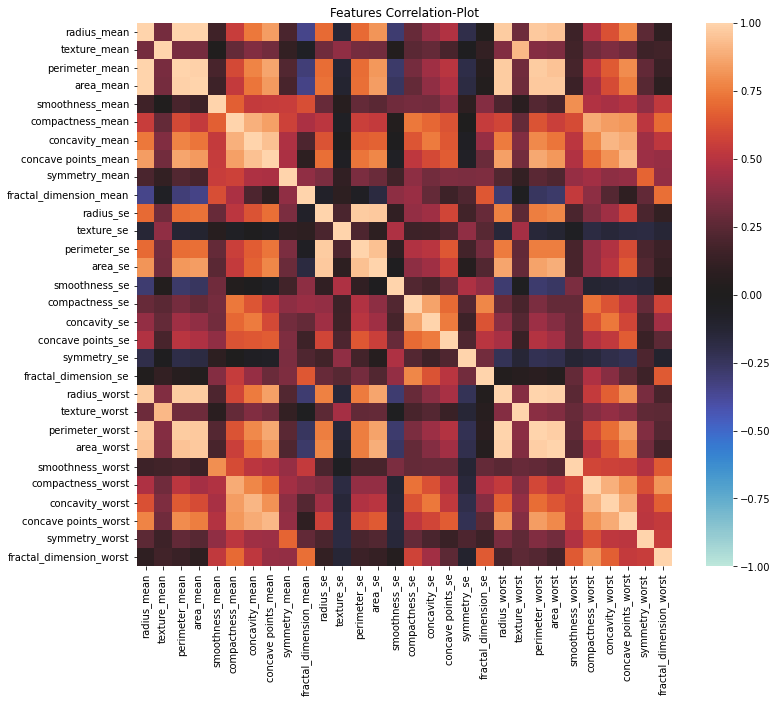

In [39]:
#Checking the correlation

features = df.columns
plt.figure(figsize=[12,10])
plt.title('Features Correlation-Plot')
sns.heatmap(df[features].corr(), vmin=-1, vmax=1, center=0) #, annot=True
plt.show()

**Inference:** \
Correlation plt between the variables convey lot of information about the realationship betweem them. The features do not have strong multi-collinearity between them like those of charges with age & smoking. Hence we shall perform Feature Selection/Extraction steps to take care of these multi-collinearity...

**Strategy:** \
We can fix these multicollinearity with two techniques:
1. Manual Method - Variance Inflation Factor (VIF)
2. Automatic Method - Recursive Feature Elimination (RFE)

## 5a. Manual Method - VIF

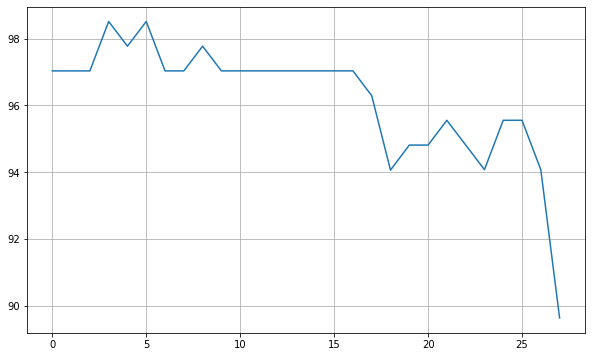

In [40]:
# Calculate the VIFs to remove multicollinearity

DROP=[]; scores=[]
#scores.append(f1_score(Test_Y,LogisticRegression().fit(Train_X_std, Train_Y).predict(Test_X_std)))

for i in range(len(X.columns.values)-2):
    vif = pd.DataFrame()
    Xs = X.drop(DROP,axis=1)
    #print(DROP)
    vif['Features'] = Xs.columns
    vif['VIF'] = [variance_inflation_factor(Xs.values, i) for i in range(Xs.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    vif.reset_index(drop=True, inplace=True)
    DROP.append(vif.Features[0])
    if vif.VIF[0]>=2.5:
        scores.append(f1_score(Test_Y,LogisticRegression().fit(Train_X_std.drop(DROP,axis=1), Train_Y).predict(Test_X_std.drop(DROP,axis=1)),average='weighted')*100)
    #print(scores)
    
plt.plot(scores)
#plt.ylim([0.7,0.85])
plt.grid()
plt.show()

## 5b. Automatic Method - RFE

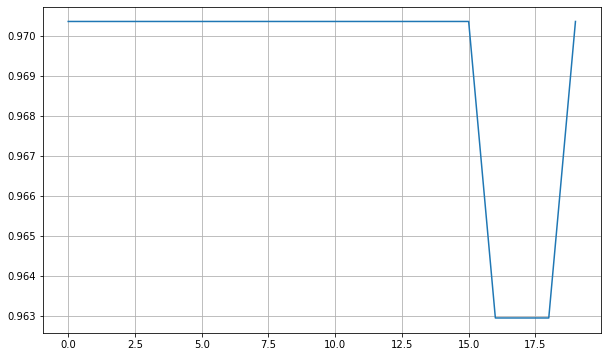

In [42]:
# Applying Recurrsive Feature Elimination

# Running RFE with the output number of the variable equal to 10
LR = LogisticRegression()#.fit(Train_X_std, Train_Y)
scores=[]

for i in range(20):
    rfe = RFE(LR,n_features_to_select=len(Train_X_std.columns)-i)   
    rfe = rfe.fit(Train_X_std, Train_Y)
    scores.append(f1_score(Test_Y,LR.fit(Train_X_std[Train_X_std.columns[rfe.support_]], Train_Y).predict(Test_X_std[Train_X_std.columns[rfe.support_]]), average='weighted'))
    #print(scores)
    
plt.plot(scores)
#plt.ylim([0.80,0.84])
plt.grid()
plt.show()

**Inference:** In both VIF & RFE Techniques, we can notice better scores upon dropping some multicollinear features. While the scores of VIF technique decline wrt to each feature drop, the RFE technique can increase the F2-score for dropping 2 features. Hence we shall use the features shortlisted by RFE Technique.

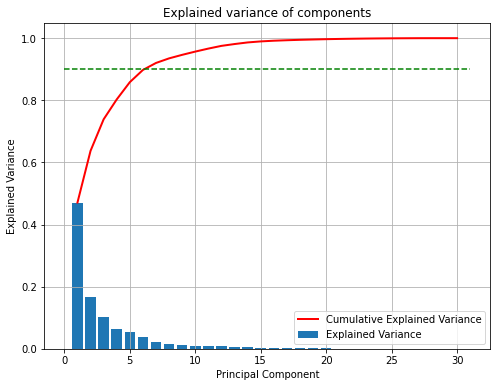

In [93]:
from sklearn.decomposition import PCA

pca = PCA().fit(Train_X_std)

fig, ax = plt.subplots(figsize=(8,6))
x_values = range(1, pca.n_components_+1)
ax.bar(x_values, pca.explained_variance_ratio_, lw=2, label='Explained Variance')
ax.plot(x_values, np.cumsum(pca.explained_variance_ratio_), lw=2, label='Cumulative Explained Variance', color='red')
plt.plot([0,pca.n_components_+1],[0.90,0.90],'g--')
#plt.plot([10,10],[0,1],'g--')
ax.set_title('Explained variance of components')
ax.set_xlabel('Principal Component')
ax.set_ylabel('Explained Variance')
plt.grid()
plt.legend()
plt.show()

**Inference:** We shall try to capture 90% of the variance explained by the PCA model, which boils down to nearly 7 pca components.

In [94]:
#Applying PCA Transformations

pca = PCA(n_components=7)

Train_X_std_pca = pca.fit_transform(Train_X_std)
print('The shape of final transformed training feature set:')
print(Train_X_std_pca.shape)
Train_X_std_pca = pd.DataFrame(Train_X_std_pca)

Test_X_std_pca = pca.transform(Test_X_std)
print('\nThe shape of final transformed testing feature set:')
print(Test_X_std_pca.shape)
Test_X_std_pca = pd.DataFrame(Test_X_std_pca)

Train_X_std = Train_X_std_pca
Test_X_std = Test_X_std_pca

The shape of final transformed training feature set:
(539, 7)

The shape of final transformed testing feature set:
(135, 7)


---

## <center> 6. Predictive Modeling

In [95]:
#Let us create first create a table to store the results of various models 

Evaluation_Results = pd.DataFrame(np.zeros((8,5)), columns=['Accuracy', 'Precision','Recall','F1-score','AUC-ROC score'])
Evaluation_Results.index=['Logistic Regression (LR)','Decision Tree Classifier (DT)','Random Forest Classifier (RF)','Naïve Bayes Classifier (NB)',
                         'Support Vector Machine (SVM)','K Nearest Neighbours (KNN)', 'Gradient Boosting (GB)','Extreme Gradient Boosting (XGB)']
Evaluation_Results

,Accuracy,Precision,Recall,F1-score,AUC-ROC score
Logistic Regression (LR),0.0,0.0,0.0,0.0,0.0
Decision Tree Classifier (DT),0.0,0.0,0.0,0.0,0.0
Random Forest Classifier (RF),0.0,0.0,0.0,0.0,0.0
Naïve Bayes Classifier (NB),0.0,0.0,0.0,0.0,0.0
Support Vector Machine (SVM),0.0,0.0,0.0,0.0,0.0
K Nearest Neighbours (KNN),0.0,0.0,0.0,0.0,0.0
Gradient Boosting (GB),0.0,0.0,0.0,0.0,0.0
Extreme Gradient Boosting (XGB),0.0,0.0,0.0,0.0,0.0


In [107]:
#Let us define functions to summarise the Prediction's scores .

#Classification Summary Function
def Classification_Summary(pred,pred_prob,i):
    Evaluation_Results.iloc[i]['Accuracy']=round(accuracy_score(Test_Y, pred),3)*100   
    Evaluation_Results.iloc[i]['Precision']=round(precision_score(Test_Y, pred),3)*100 #, average='weighted'
    Evaluation_Results.iloc[i]['Recall']=round(recall_score(Test_Y, pred),3)*100 #, average='weighted'
    Evaluation_Results.iloc[i]['F1-score']=round(f1_score(Test_Y, pred),3)*100 #, average='weighted'
    Evaluation_Results.iloc[i]['AUC-ROC score']=round(roc_auc_score(Test_Y, pred_prob[:, 1]),3)*100 #, multi_class='ovr'
    print('{}{}\033[1m Evaluating {} \033[0m{}{}\n'.format('<'*3,'-'*35,Evaluation_Results.index[i], '-'*35,'>'*3))
    print('Accuracy = {}%'.format(round(accuracy_score(Test_Y, pred),3)*100))
    print('F1 Score = {}%'.format(round(f1_score(Test_Y, pred),3)*100)) #, average='weighted'
    print('\n \033[1mConfusiton Matrix:\033[0m\n',confusion_matrix(Test_Y, pred))
    print('\n\033[1mClassification Report:\033[0m\n',classification_report(Test_Y, pred))
    
    auc_roc(Test_Y, pred_prob, curves=['each_class'])
    plt.show()

#Visualising Function
def AUC_ROC_plot(Test_Y, pred):    
    ref = [0 for _ in range(len(Test_Y))]
    ref_auc = roc_auc_score(Test_Y, ref)
    lr_auc = roc_auc_score(Test_Y, pred)

    ns_fpr, ns_tpr, _ = roc_curve(Test_Y, ref)
    lr_fpr, lr_tpr, _ = roc_curve(Test_Y, pred)

    plt.plot(ns_fpr, ns_tpr, linestyle='--')
    plt.plot(lr_fpr, lr_tpr, marker='.', label='AUC = {}'.format(round(roc_auc_score(Test_Y, pred)*100,2))) 
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend()
    plt.show()

---

## 1. Logistic Regression:

<<<----------------------------------- Evaluating Logistic Regression (LR) ----------------------------------->>>

Accuracy = 95.6%
F1 Score = 95.5%

 Confusiton Matrix:
 [[66  2]
 [ 4 63]]

Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.97      0.96        68
           1       0.97      0.94      0.95        67

    accuracy                           0.96       135
   macro avg       0.96      0.96      0.96       135
weighted avg       0.96      0.96      0.96       135



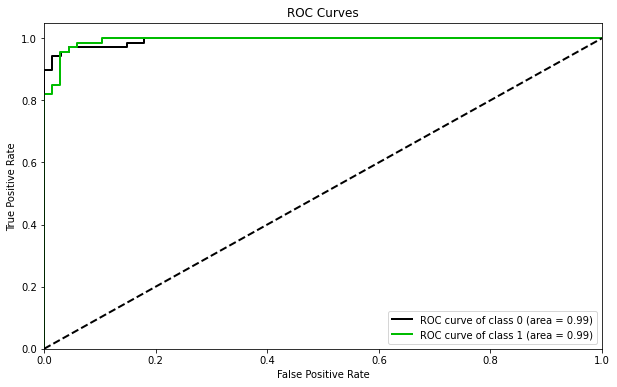


Interpreting the Output of Logistic Regression:

intercept  -1.8457002540121026
classes [0 1]


,coeff
0,-3.194704
1,1.511225
2,0.727735
3,-1.086979
4,1.581943
5,1.101273
6,0.205932


In [110]:
# Building Logistic Regression Classifier

LR_model = LogisticRegression()

space = dict()
space['solver'] = ['newton-cg', 'lbfgs', 'liblinear']
space['penalty'] = ['none', 'l1', 'l2', 'elasticnet']
space['C'] = loguniform(1e-5, 100)

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

RCV = RandomizedSearchCV(LR_model, space, n_iter=50, scoring='roc_auc', n_jobs=-1, cv=5, random_state=1)

LR = RCV.fit(Train_X_std, Train_Y).best_estimator_
pred = LR.predict(Test_X_std)
pred_prob = LR.predict_proba(Test_X_std)
Classification_Summary(pred,pred_prob,0)

print('\n\033[1mInterpreting the Output of Logistic Regression:\n\033[0m')

print('intercept ', LR.intercept_[0])
print('classes', LR.classes_)
display(pd.DataFrame({'coeff': LR.coef_[0]}, index=Train_X_std.columns))

---

## 2. Decisoin Tree Classfier:

<<<----------------------------------- Evaluating Decision Tree Classifier (DT) ----------------------------------->>>

Accuracy = 92.60000000000001%
F1 Score = 92.30000000000001%

 Confusiton Matrix:
 [[65  3]
 [ 7 60]]

Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.96      0.93        68
           1       0.95      0.90      0.92        67

    accuracy                           0.93       135
   macro avg       0.93      0.93      0.93       135
weighted avg       0.93      0.93      0.93       135



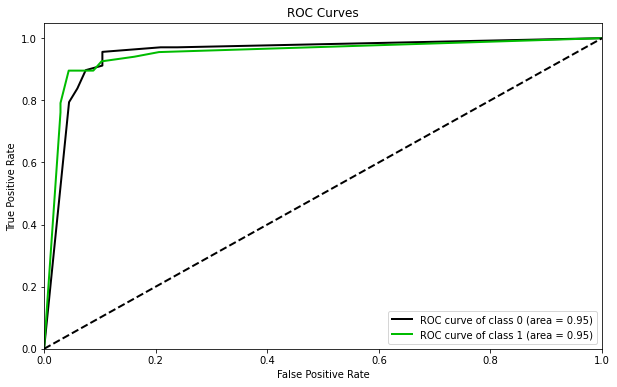


Interpreting the output of Decision Tree:



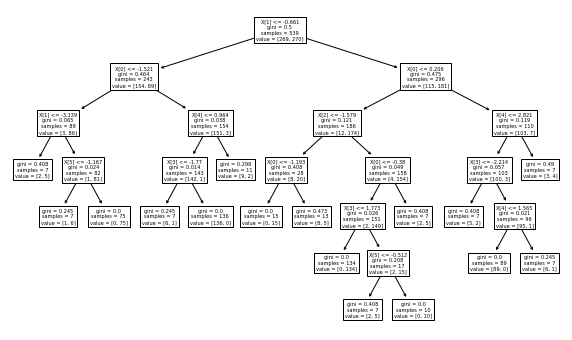

In [111]:
#Building Decision Tree Classifier

DT_model = DecisionTreeClassifier()

param_dist = {"max_depth": [3, None],
              "max_features": randint(1, 9),
              "min_samples_leaf": randint(1, 9),
              "criterion": ["gini", "entropy"]}

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

RCV = RandomizedSearchCV(DT_model, param_dist, n_iter=50, scoring='roc_auc', n_jobs=-1, cv=5, random_state=1)

DT = RCV.fit(Train_X_std, Train_Y).best_estimator_
pred = DT.predict(Test_X_std)
pred_prob = DT.predict_proba(Test_X_std)
Classification_Summary(pred,pred_prob,1)

print('\n\033[1mInterpreting the output of Decision Tree:\n\033[0m')
tree.plot_tree(DT)
plt.show()

---

## 3. Random Forest Classfier:

<<<----------------------------------- Evaluating Random Forest Classifier (RF) ----------------------------------->>>

Accuracy = 94.8%
F1 Score = 94.69999999999999%

 Confusiton Matrix:
 [[65  3]
 [ 4 63]]

Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.96      0.95        68
           1       0.95      0.94      0.95        67

    accuracy                           0.95       135
   macro avg       0.95      0.95      0.95       135
weighted avg       0.95      0.95      0.95       135



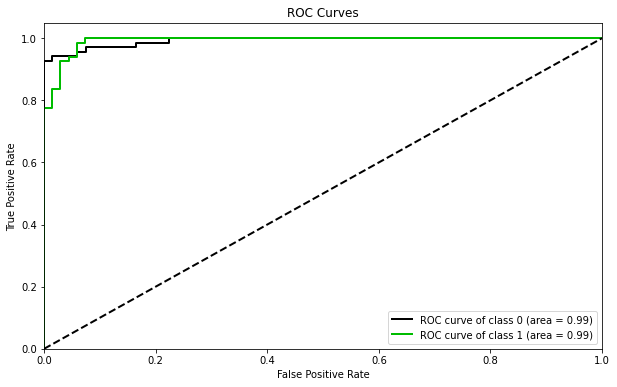


Interpreting the output of Random Forest:



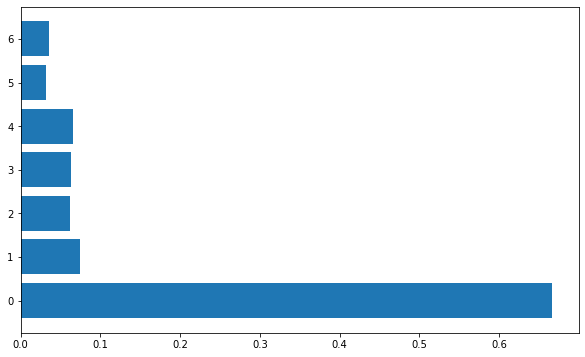

In [112]:
# Building Random-Forest Classifier

RF_model = RandomForestClassifier()

param_dist={'bootstrap': [True, False],
            'max_depth': [10, 20, 50, 100, None],
            'max_features': ['auto', 'sqrt'],
            'min_samples_leaf': [1, 2, 4],
            'min_samples_split': [2, 5, 10],
            'n_estimators': [200, 500,]}

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

RCV = RandomizedSearchCV(RF_model, param_dist, n_iter=50, scoring='roc_auc', n_jobs=-1, cv=5, random_state=1)

RF = RCV.fit(Train_X_std, Train_Y).best_estimator_
pred = RF.predict(Test_X_std)
pred_prob = RF.predict_proba(Test_X_std)
Classification_Summary(pred,pred_prob,2)

print('\n\033[1mInterpreting the output of Random Forest:\n\033[0m')
rfi=pd.Series(RF.feature_importances_, index=Train_X_std.columns).sort_values(ascending=False)
plt.barh(rfi.index,rfi.values)
plt.show()

---

## 4. Naive Bayes Classfier:

<<<----------------------------------- Evaluating Naïve Bayes Classifier (NB) ----------------------------------->>>

Accuracy = 91.10000000000001%
F1 Score = 91.3%

 Confusiton Matrix:
 [[60  8]
 [ 4 63]]

Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.88      0.91        68
           1       0.89      0.94      0.91        67

    accuracy                           0.91       135
   macro avg       0.91      0.91      0.91       135
weighted avg       0.91      0.91      0.91       135



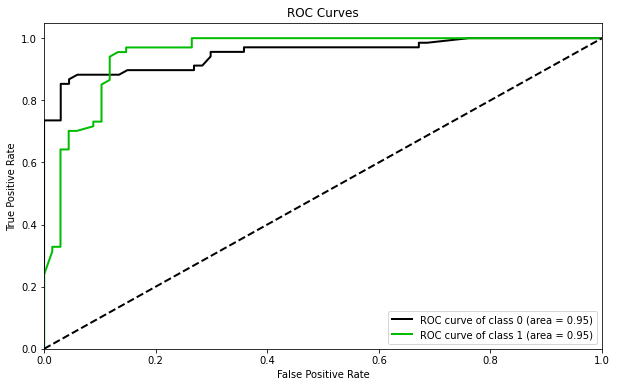

In [113]:
# Building Naive Bayes Classifier

NB_model = BernoulliNB()

params = {'alpha': [0.01, 0.1, 0.5, 1.0, 10.0]}
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

RCV = RandomizedSearchCV(NB_model, params, n_iter=50, scoring='roc_auc', n_jobs=-1, cv=5, random_state=1)

NB = RCV.fit(Train_X_std, Train_Y).best_estimator_
pred = NB.predict(Test_X_std)
pred_prob = NB.predict_proba(Test_X_std)
Classification_Summary(pred,pred_prob,3)

---

## 5. Support Vector Machine Classfier:

<<<----------------------------------- Evaluating Support Vector Machine (SVM) ----------------------------------->>>

Accuracy = 97.0%
F1 Score = 97.0%

 Confusiton Matrix:
 [[66  2]
 [ 2 65]]

Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.97      0.97        68
           1       0.97      0.97      0.97        67

    accuracy                           0.97       135
   macro avg       0.97      0.97      0.97       135
weighted avg       0.97      0.97      0.97       135



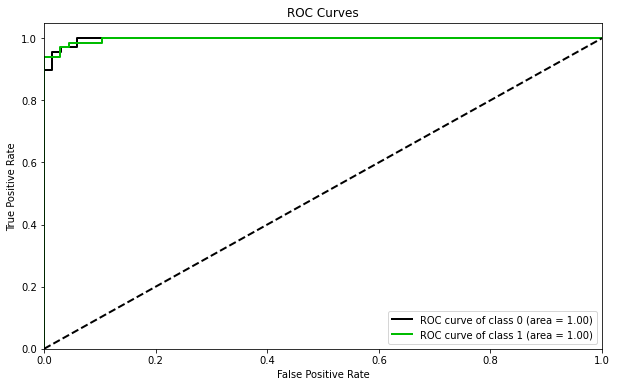

In [114]:
# Building Support Vector Machine Classifier

SVM_model = SVC(probability=True).fit(Train_X_std, Train_Y)

svm_param = {"C": [.01, .1, 1, 5, 10, 100],             
             "gamma": [.01, .1, 1, 5, 10, 100],
             "kernel": ["rbf"],
             "random_state": [1]}

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

RCV = RandomizedSearchCV(SVM_model, svm_param, n_iter=50, scoring='roc_auc', n_jobs=-1, cv=5, random_state=1)

SVM = RCV.fit(Train_X_std, Train_Y).best_estimator_
pred = SVM.predict(Test_X_std)
pred_prob = SVM.predict_proba(Test_X_std)
Classification_Summary(pred,pred_prob,4)

---

## 6. K-Nearest Neighbours Classfier:

<<<----------------------------------- Evaluating K Nearest Neighbours (KNN) ----------------------------------->>>

Accuracy = 96.3%
F1 Score = 96.2%

 Confusiton Matrix:
 [[66  2]
 [ 3 64]]

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.97      0.96        68
           1       0.97      0.96      0.96        67

    accuracy                           0.96       135
   macro avg       0.96      0.96      0.96       135
weighted avg       0.96      0.96      0.96       135



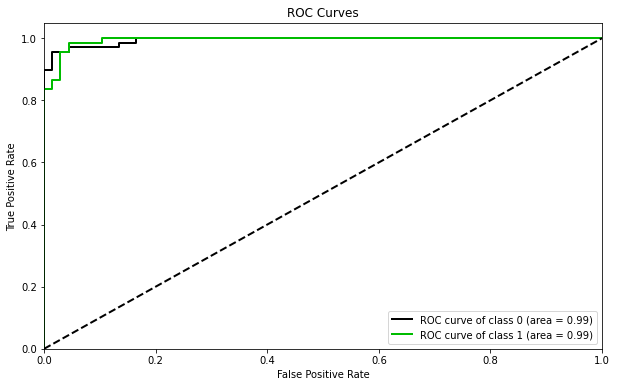

In [115]:
# Building K-Neareset Neighbours Classifier

KNN_model = KNeighborsClassifier()

knn_param = {"n_neighbors": [i for i in range(1,30,5)],
             "weights": ["uniform", "distance"],
             "algorithm": ["ball_tree", "kd_tree", "brute"],
             "leaf_size": [1, 10, 30],
             "p": [1,2]}

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

RCV = RandomizedSearchCV(KNN_model, knn_param, n_iter=50, scoring='roc_auc', n_jobs=-1, cv=5, random_state=1)

KNN = RCV.fit(Train_X_std, Train_Y).best_estimator_
pred = KNN.predict(Test_X_std)
pred_prob = KNN.predict_proba(Test_X_std)
Classification_Summary(pred,pred_prob,5)

---

## 7. Gradient Boosting Classfier:

<<<----------------------------------- Evaluating Gradient Boosting (GB) ----------------------------------->>>

Accuracy = 94.1%
F1 Score = 93.89999999999999%

 Confusiton Matrix:
 [[65  3]
 [ 5 62]]

Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.96      0.94        68
           1       0.95      0.93      0.94        67

    accuracy                           0.94       135
   macro avg       0.94      0.94      0.94       135
weighted avg       0.94      0.94      0.94       135



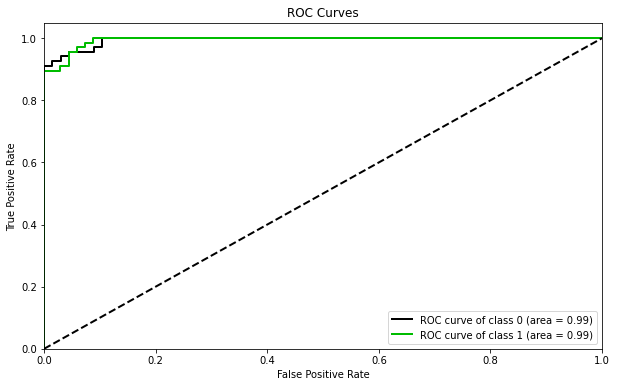

In [116]:
# Building Gradient Boosting Classifier

GB_model = GradientBoostingClassifier().fit(Train_X_std, Train_Y)
param_dist = {
    "n_estimators":[5,50,250,500],
    "max_depth":[1,3,5,7,9],
    "learning_rate":[0.01,0.1,1,10,100]
}

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

RCV = RandomizedSearchCV(GB_model, param_dist, n_iter=50, scoring='roc_auc', n_jobs=-1, cv=5, random_state=1)

GB = RCV.fit(Train_X_std, Train_Y).best_estimator_
pred = GB.predict(Test_X_std)
pred_prob = GB.predict_proba(Test_X_std)
Classification_Summary(pred,pred_prob,6)

---

## 8. Extreme Gradient Boosting Classfier:

[01:09:38] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[01:09:46] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
<<<----------------------------------- Evaluating Extreme Gradient Boosting (XGB) ----------------------------------->>>

Accuracy = 94.1%
F1 Score = 93.89999999999999%

 Confusiton Matrix:
 [[65  3]
 [ 5 62]]

Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.96      0.94        68
           1       0.95      0.93   

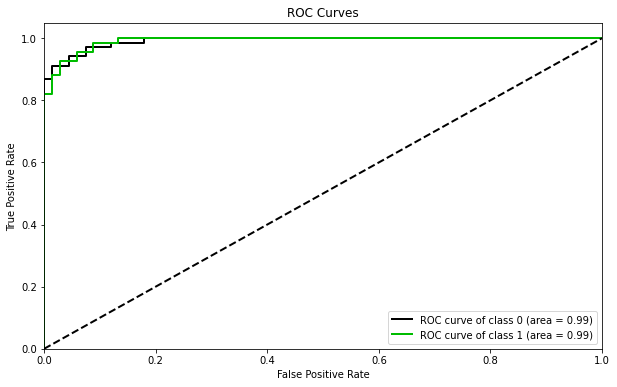

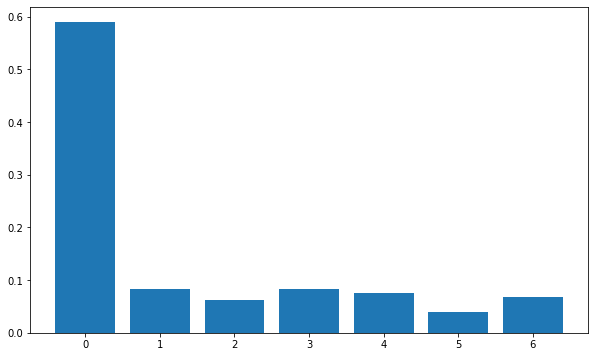

In [138]:
# Building Extreme Gradient Boosting Classifier

XGB_model = XGBClassifier().fit(Train_X_std, Train_Y)

param_dist = {
 "learning_rate" : [0.05,0.10,0.15,0.20,0.25,0.30],
 "max_depth" : [ 3, 4, 5, 6, 8, 10, 12, 15],
 "min_child_weight" : [ 1, 3, 5, 7 ],
 "gamma": [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
 "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ]
}

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

RCV = RandomizedSearchCV(XGB_model, param_dist, n_iter=50, scoring='roc_auc', n_jobs=-1, cv=5, random_state=1)

XGB = RCV.fit(Train_X_std, Train_Y).best_estimator_
pred = XGB.predict(Test_X_std)
pred_prob = XGB.predict_proba(Test_X_std)
Classification_Summary(pred,pred_prob,7)

plt.bar( Train_X_std.columns,XGB.feature_importances_,)
plt.show()

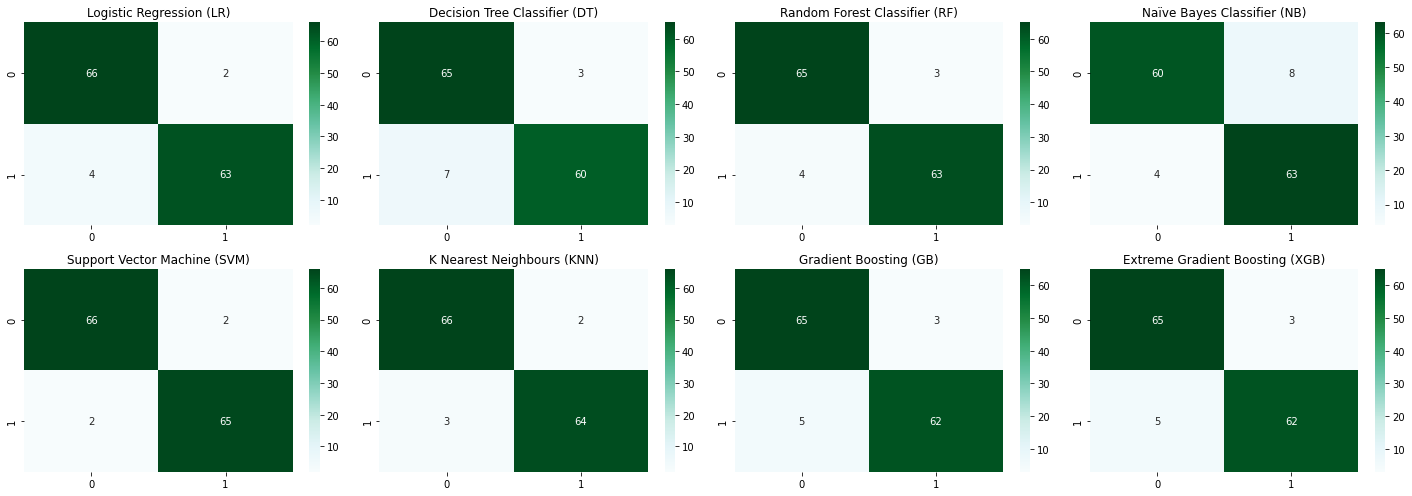

In [118]:
#Plotting Confusion-Matrix of all the predictive Models

def plot_cm(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred, labels=np.unique(y_true))
    cm_sum = np.sum(cm, axis=1, keepdims=True)
    cm_perc = cm / cm_sum.astype(float) * 100
    annot = np.empty_like(cm).astype(str)
    nrows, ncols = cm.shape
    for i in range(nrows):
        for j in range(ncols):
            c = cm[i, j]
            p = cm_perc[i, j]
            if i == j:
                s = cm_sum[i]
                annot[i, j] = '%.1f%%\n%d/%d' % (p, c, s)
            elif c == 0:
                annot[i, j] = ''
            else:
                annot[i, j] = '%.1f%%\n%d' % (p, c)
    cm = pd.DataFrame(cm, index=np.unique(y_true), columns=np.unique(y_true))
    cm.columns=labels
    cm.index=labels
    cm.index.name = 'Actual'
    cm.columns.name = 'Predicted'
    #fig, ax = plt.subplots()
    sns.heatmap(cm, annot=annot, fmt='')# cmap= "GnBu"
    
def conf_mat_plot(all_models):
    plt.figure(figsize=[20,3.5*math.ceil(len(all_models)*len(labels)/14)])
    
    for i in range(len(all_models)):
        if len(labels)<=4:
            plt.subplot(2,4,i+1)
        else:
            plt.subplot(math.ceil(len(all_models)/3),3,i+1)
        pred = all_models[i].predict(Test_X_std)
        #plot_cm(Test_Y, pred)
        sns.heatmap(confusion_matrix(Test_Y, pred), annot=True, cmap='BuGn', fmt='.0f') #vmin=0,vmax=5
        plt.title(Evaluation_Results.index[i])
    plt.tight_layout()
    plt.show()

conf_mat_plot([LR,DT,RF,NB,SVM,KNN,GB,XGB])

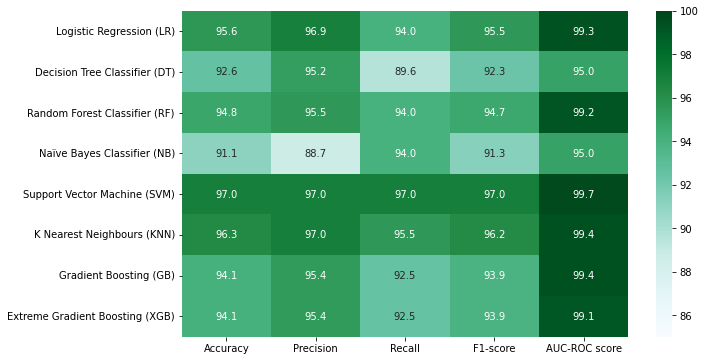

In [123]:
#Comparing all the models Scores

#plt.figure(figsize=[12,5])
sns.heatmap(Evaluation_Results, annot=True, vmin=85, vmax=100, cmap='BuGn', fmt='.1f')
plt.show()

**Insights:** For the current problem statement, it is more important to focus on the Recall-score. Except Decision Trees & Boosting Classifier, most of the algorithms perform well. The best performing algorithm in this case is Support Vector Machines Classifier...

---

## <center> 7. Project Outcomes & Conclusions

### Here are some of the key outcomes of the project:
- The Dataset was small totally around 569 samples & after preprocessing 8.3% of the datasamples were dropped. 
- The samples were highly imbalanced, hence SMOTE Technique was applied on the data to  balance the classes, adding 21.3% more samples to the dataset.
- Visualising the distribution of data & their relationships, helped us to get some insights on the relationship between the featureset.
- Feature Selection/Eliminination was carried out and appropriate features were shortlisted.
- Testing multiple algorithms with fine-tuning hyperparamters gave us some understanding on the model performance for various algorithms on this specific dataset.
- The Support Vector algorithm perform the best on the current dataset, considering Recall as the key-metric, as is relatively ok to falsely classify any patient as False Positive, but can be quiet dangerous if classified as False Negative.
- Yet it wise to also consider simpler model like Logistic Regression as it is more generalisable & is computationally less expensive.

In [ ]:
<<<----------------------------------------------------------THE END----------------------------------------------------------------->>>